In [ ]:
import pandas as pd

# ✅ 데이터 불러오기
df = pd.read_csv("solar3.csv", encoding='utf-8')

### 그래프

In [5]:
'''
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# ✅ 사용자 설정: y축 범위
y_eff_min, y_eff_max = 0.0, 0.35    # 발전효율 범위
y_irr_min, y_irr_max = 0.0, 3.0     # 일사량 범위

# ✅ 폰트 설정 (한글 깨짐 방지)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# ✅ 데이터 불러오기
df = pd.read_csv("solar3.csv", encoding='utf-8')

# ✅ 일자 → 연월
df['일자'] = pd.to_datetime(df['일자'], errors='coerce')
df['연월'] = df['일자'].dt.to_period('M').astype(str)

# ✅ 효율 계산 (이미 존재하지 않는 경우)
if '효율' not in df.columns:
    df['효율'] = df['발전량(kWh)'] / (df['설비용량(MW)'] * 1000)

# ✅ 월별 평균 집계
monthly = df.groupby(['발전구분', '호기', '연월'])[['효율', '일사(MJ/m2)']].mean().reset_index()

# ✅ PDF 저장
with PdfPages("solar3_월별_효율_일사_그래프.pdf") as pdf:
    for (발전구분, 호기), group in monthly.groupby(['발전구분', '호기']):
        fig, ax1 = plt.subplots(figsize=(10, 5))

        # ✅ x축 값 처리
        x_vals = pd.to_datetime(group['연월'].tolist())

        # 좌측 y축: 발전효율
        ax1.plot(x_vals, group['효율'], marker='o', color='tab:blue', label='발전효율')
        ax1.set_ylabel('발전효율', color='tab:blue')
        ax1.set_ylim(y_eff_min, y_eff_max)
        ax1.tick_params(axis='y', labelcolor='tab:blue')

        # 우측 y축: 일사량
        ax2 = ax1.twinx()
        ax2.plot(x_vals, group['일사(MJ/m2)'], marker='s', color='tab:red', label='일사량(MJ/m²)')
        ax2.set_ylabel('일사량 (MJ/m²)', color='tab:red')
        ax2.set_ylim(y_irr_min, y_irr_max)
        ax2.tick_params(axis='y', labelcolor='tab:red')

        # ✅ x축 눈금 두 달 간격 설정
        tick_idx = list(range(0, len(x_vals), 2))
        tick_locs = [x_vals[i] for i in tick_idx]
        tick_labels = group['연월'].iloc[tick_idx].tolist()
        ax1.set_xticks(tick_locs)
        ax1.set_xticklabels(tick_labels, rotation=45)

        # ✅ 제목 및 레이아웃
        plt.title(f'{발전구분} - {호기}호기 월별 발전효율 및 일사량')
        ax1.set_xlabel('연월')
        fig.tight_layout()

        pdf.savefig()
        plt.show()

print("✅ PDF 저장 완료: solar3_월별_효율_일사_그래프.pdf")
'''


'\nimport pandas as pd\nimport matplotlib.pyplot as plt\nfrom matplotlib.backends.backend_pdf import PdfPages\n\n# ✅ 사용자 설정: y축 범위\ny_eff_min, y_eff_max = 0.0, 0.35    # 발전효율 범위\ny_irr_min, y_irr_max = 0.0, 3.0     # 일사량 범위\n\n# ✅ 폰트 설정 (한글 깨짐 방지)\nplt.rcParams[\'font.family\'] = \'Malgun Gothic\'\nplt.rcParams[\'axes.unicode_minus\'] = False\n\n# ✅ 데이터 불러오기\ndf = pd.read_csv("solar3.csv", encoding=\'utf-8\')\n\n# ✅ 일자 → 연월\ndf[\'일자\'] = pd.to_datetime(df[\'일자\'], errors=\'coerce\')\ndf[\'연월\'] = df[\'일자\'].dt.to_period(\'M\').astype(str)\n\n# ✅ 효율 계산 (이미 존재하지 않는 경우)\nif \'효율\' not in df.columns:\n    df[\'효율\'] = df[\'발전량(kWh)\'] / (df[\'설비용량(MW)\'] * 1000)\n\n# ✅ 월별 평균 집계\nmonthly = df.groupby([\'발전구분\', \'호기\', \'연월\'])[[\'효율\', \'일사(MJ/m2)\']].mean().reset_index()\n\n# ✅ PDF 저장\nwith PdfPages("solar3_월별_효율_일사_그래프.pdf") as pdf:\n    for (발전구분, 호기), group in monthly.groupby([\'발전구분\', \'호기\']):\n        fig, ax1 = plt.subplots(figsize=(10, 5))\n\n        # ✅ x축 값 처리\n        x_vals =

 ### 전처리

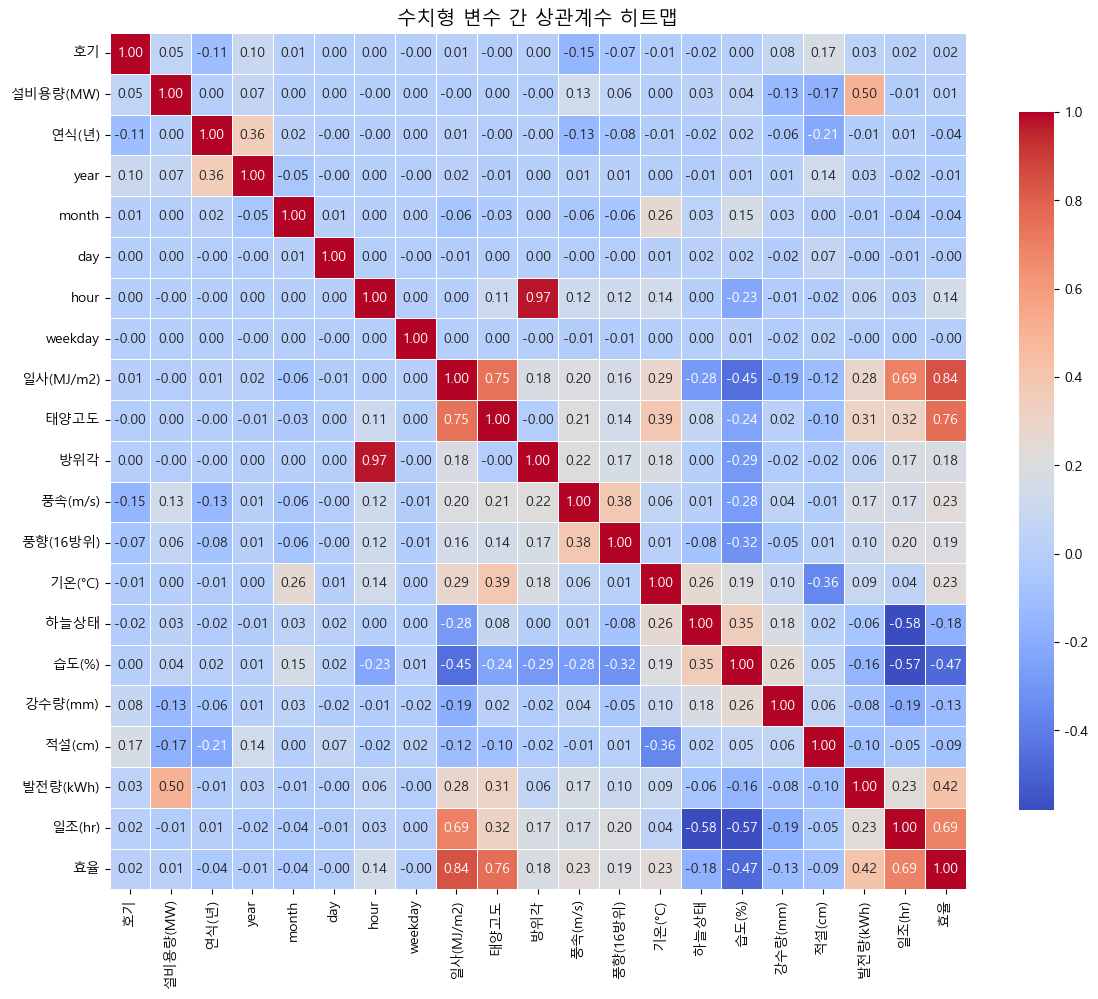

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ 수치형 컬럼만 추출해서 상관계수 계산
corr = df.select_dtypes(include='number').corr()

# ✅ 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title("수치형 변수 간 상관계수 히트맵", fontsize=14)
plt.tight_layout()
plt.savefig("correlation_heatmap.png", dpi=300)
plt.show()


In [12]:
import pandas as pd
import numpy as np

# ✅ 일자/시간 정보 정제
if not np.issubdtype(df['일자'].dtype, np.datetime64):
    df['일자'] = pd.to_datetime(df['일자'], errors='coerce')

df['month'] = df['일자'].dt.month
df['hour'] = df['hour'].astype(int)

# ✅ 수치형 컬럼만 대상으로 설정
numeric_cols = df.select_dtypes(include='number').columns.drop(['hour', 'month'], errors='ignore')

# ✅ 시간대별 결측/0 비율 계산
hour_summary = []
for col in numeric_cols:
    grouped = df.groupby('hour')[col].agg(
        total='count',
        missing=lambda x: x.isna().sum(),
        zero=lambda x: (x == 0).sum()
    )
    grouped['결측비율'] = grouped['missing'] / grouped['total']
    grouped['0값비율'] = grouped['zero'] / grouped['total']
    grouped['컬럼명'] = col
    hour_summary.append(grouped[['결측비율', '0값비율', '컬럼명']])

hour_result = pd.concat(hour_summary).reset_index()

# ✅ 월별 결측/0 비율 계산
month_summary = []
for col in numeric_cols:
    grouped = df.groupby('month')[col].agg(
        total='count',
        missing=lambda x: x.isna().sum(),
        zero=lambda x: (x == 0).sum()
    )
    grouped['결측비율'] = grouped['missing'] / grouped['total']
    grouped['0값비율'] = grouped['zero'] / grouped['total']
    grouped['컬럼명'] = col
    month_summary.append(grouped[['결측비율', '0값비율', '컬럼명']])

month_result = pd.concat(month_summary).reset_index()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# ✅ 결과 출력
print("⏰ [시간대별] 결측비율 및 0값비율")
print(hour_result)

print("\n📅 [월별] 결측비율 및 0값비율")
print(month_result)


⏰ [시간대별] 결측비율 및 0값비율
     hour          결측비율      0값비율        컬럼명
0       0  0.000000e+00  0.000000         호기
1       1  0.000000e+00  0.000000         호기
2       2  0.000000e+00  0.000000         호기
3       3  0.000000e+00  0.000000         호기
4       4  0.000000e+00  0.000000         호기
5       5  0.000000e+00  0.000000         호기
6       6  0.000000e+00  0.000000         호기
7       7  0.000000e+00  0.000000         호기
8       8  0.000000e+00  0.000000         호기
9       9  0.000000e+00  0.000000         호기
10     10  0.000000e+00  0.000000         호기
11     11  0.000000e+00  0.000000         호기
12     12  0.000000e+00  0.000000         호기
13     13  0.000000e+00  0.000000         호기
14     14  0.000000e+00  0.000000         호기
15     15  0.000000e+00  0.000000         호기
16     16  0.000000e+00  0.000000         호기
17     17  0.000000e+00  0.000000         호기
18     18  0.000000e+00  0.000000         호기
19     19  0.000000e+00  0.000000         호기
20     20  0.000000e+00  0.000000 